## Ideas
* Maybe make the image very large and then resize it before saving. It may make the stars look better. 
* Limit the stars to 3 different sizes (S, M, L)
* Color the stars slightly. Like a very little red, blue yellow
* Set the background color to a var
* Make the stars diameter dependant on the image size (like a percent of the height



In [96]:
from IPython.display import Image as DisplayImage
from IPython.display import SVG as DisplaySVG

from PIL import Image, ImageDraw
import svgwrite
import random
import math

# code completion helper
%config IPCompleter.greedy=True

In [99]:
class Starfield:
    def __init__(self, 
                 width=2000, height=3000, padding=10, 
                 max_radius=6, number_of_stars=1000, 
                 star_color='white', background_color='black',
                 filename='starfield.svg'):
        
        self.width = width
        self.height = height
        self.padding = padding
        self.max_radius = max_radius
        self.number_of_stars = number_of_stars
        self.star_color = star_color
        self.background_color = background_color
        self.filename = filename
      
    @staticmethod
    def get_radius_for_star(current, total, max_radius):
        # distribute the radius of the star so it prefers more smaller stars 
        # and less bigger stars
        percent = current/total * 100

        if percent <= 50:
            min = 0
            max = math.floor(max_radius * 0.2)
        elif percent > 50 and percent <= 80:
            min = math.floor(max_radius * 0.2)
            max = math.floor(max_radius * 0.4)
        elif percent > 80 and percent <= 95:
            min = math.floor(max_radius * 0.4)
            max = math.floor(max_radius * 0.9)
        else:
            min = math.floor(max_radius * 0.9)
            max = math.floor(max_radius * 1.0)

        return random.choice(range(min, max))
            
    def create_field_png(self):
        # stars image
        background = Image.new('RGBA', (self.width, self.height), color = self.background_color)
        stars = Image.new('RGBA', background.size, (255,255,255,0))

        # star object
        star = ImageDraw.Draw(stars)

        # generate stars
        
        for s in range(1, self.number_of_stars): # padding ex: randint(0+10, width-10) 
            x = random.randint(0, self.width)
            y = random.randint(0, self.height)
            diameter = self.get_radius_for_star(s, self.number_of_stars, self.max_radius) * 2
            
            # draw the star (bounding box)
            star.ellipse((x, y, x+diameter, y+diameter), fill=self.star_color)
        
        # add stars on top of background
        composite = Image.alpha_composite(background, stars)

        # save the file
        composite.save(f"starfield.png")
        
    def create_field_svg(self):
        svg = svgwrite.Drawing(self.filename, profile='tiny')

        # background
        background_rect = svg.rect((0, 0), (self.width, self.height), fill=self.background_color, id='background')
        svg.add(background_rect)
        
        # stars group
        starsGroup = svgwrite.container.Group(id='stars')

        # add the stars baby
        for s in range(1, self.number_of_stars):
            # random position for the star
            # add some padding if you don't want the stars on the very edge
            x = random.randint(self.padding,self.width-self.padding)
            y = random.randint(self.padding,self.height-self.padding)

            # only choose diameters that are even. It draws better looking cirles
            # radius = random.choice(range(2, self.max_radius, 2)) 
            radius = self.get_radius_for_star(s, self.number_of_stars, self.max_radius)
            
            # Draw a star
            star = svg.circle(center=(x, y), r=radius, fill=self.star_color, id='star')
            starsGroup.add(star)

        svg.add(starsGroup)    
        svg.save()

In [114]:
# Create the starfield instance
sf = Starfield()

# provide settings to customize your image. You do not need to provide any 
# setting to produce the first image. There are preset defaults for all values. 
#sf.background_color = 'blue'
sf.width = 2880*2
sf.height = 1800*2
sf.max_radius = 8
sf.number_of_stars = 1400
sf.create_field_svg()
sf.create_field_png()

In [110]:
DisplaySVG(filename='starfield.svg')

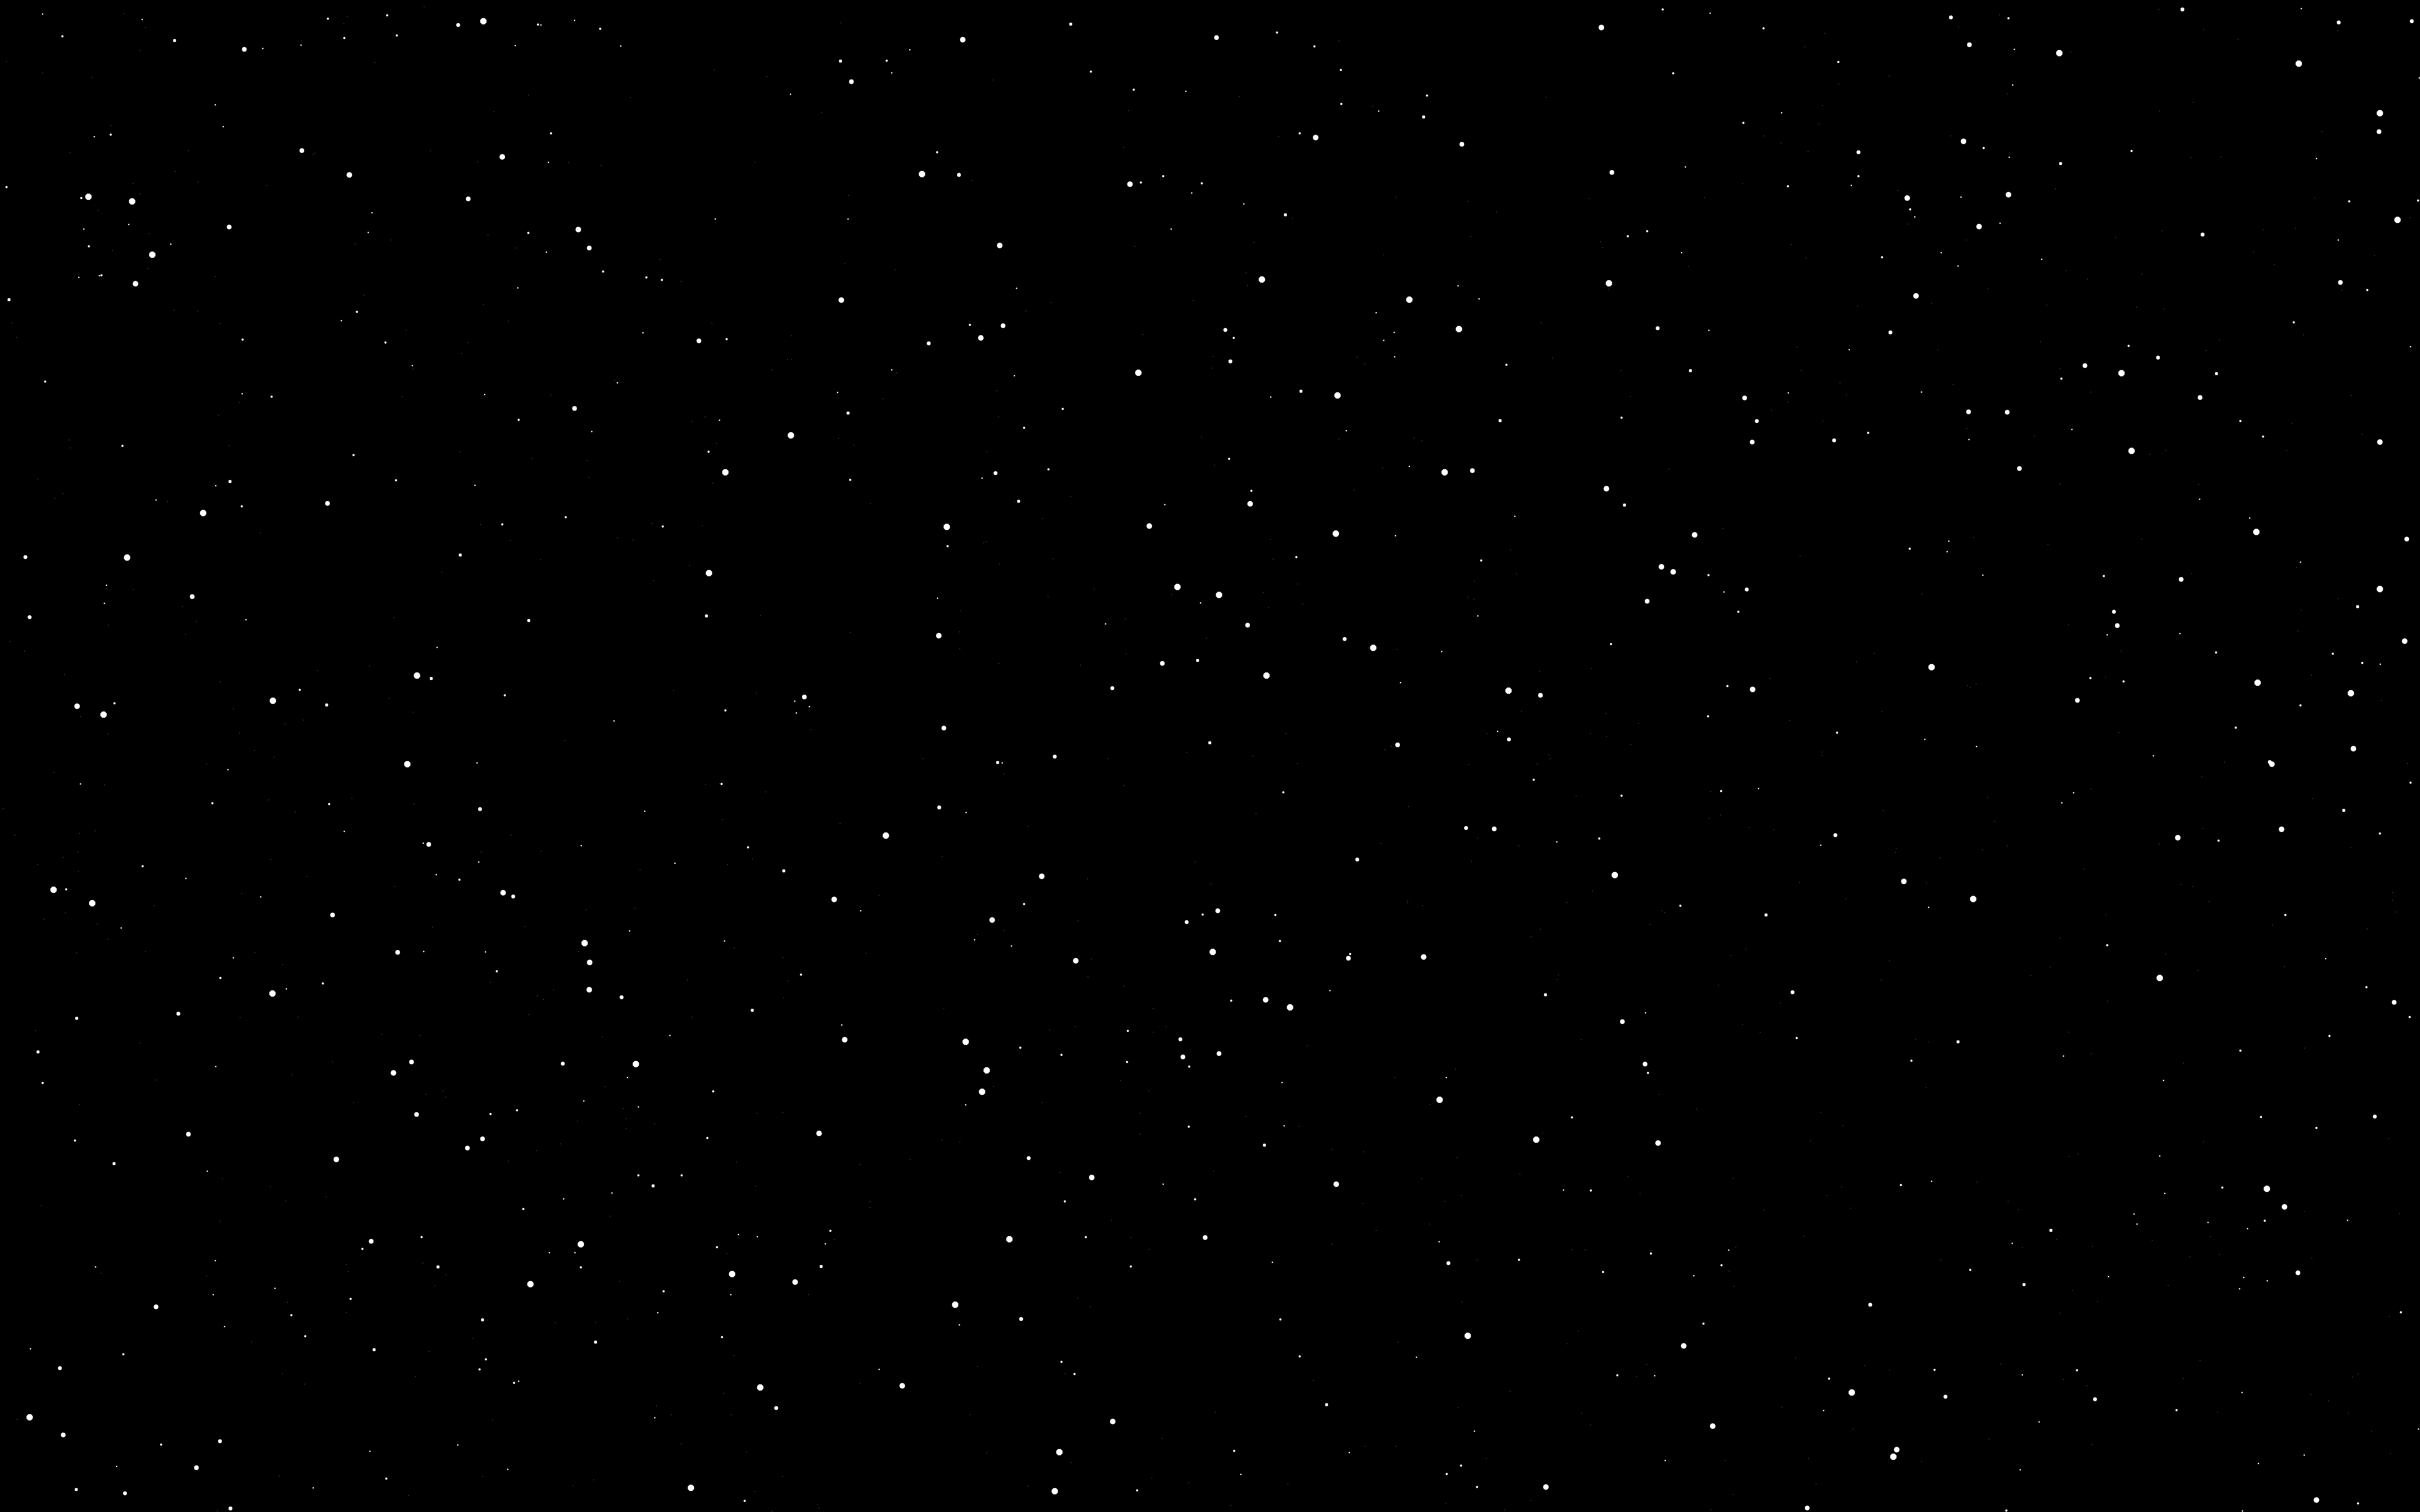

In [115]:
DisplayImage(filename='starfield.png') 